In [2]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# reading the datasets

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'D:\python and r\udemy avinash\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\u.data', 
                 sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv(r"D:\python and r\udemy avinash\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
# Merging both the data togeather
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
# creating rating dataframe with average ratings and number of ratings

df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['Num_of_counts']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,Num_of_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


[]

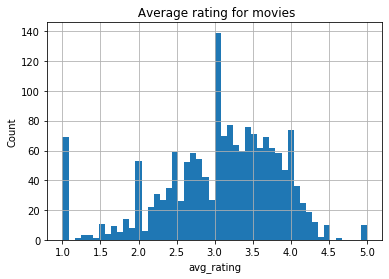

In [16]:
ratings['rating'].hist(bins=50)
plt.title(" Average rating for movies")
plt.xlabel("avg_rating")
plt.ylabel("Count")
plt.plot()

[]

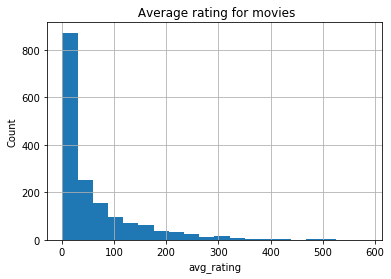

In [17]:
ratings['Num_of_counts'].hist(bins=20)
plt.title(" Average rating for movies")
plt.xlabel("avg_rating")
plt.ylabel("Count")
plt.plot()

In [19]:
ratings.sort_values('Num_of_counts',ascending=False).head(10)

,rating,Num_of_counts
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [20]:
# based on the rating count the above 10 can be recommanded as popular movies
# But the movie having highest count do not have the higest ratings 
# Hence we have to look for the better method for recommandation system

In [21]:
# create a matrix that has the user ids on one axis and the movie title on another axis. 
# Each cell will then consist of the rating the user gave to that movie. 
# Note there will be a lot of NaN values, because most people have not seen most of the movies.
# Hence the matrix is called sparse matrix

In [23]:
moviematrix=pd.pivot_table(index='user_id',columns='title',values='rating',data=df)
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings.sort_values('Num_of_counts',ascending=False).head()

,rating,Num_of_counts
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [25]:
# Selecting a movie to find the similar kinds od movies for that movie

In [27]:
starwar_ratings=moviematrix['Star Wars (1977)']
starwar_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [28]:
# getting most simlar values for the movie star wars from moviematrix using corrwith()

similar_movies=moviematrix.corrwith(starwar_ratings)
similar_movies.head()

C:\Users\Admin\anaconda new\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\anaconda new\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [30]:
starwar_correlation=pd.DataFrame(similar_movies,columns=['correlation'])
starwar_correlation.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [31]:
starwar_correlation.sort_values("correlation",ascending=False).head()

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [32]:
# Now if we sort the dataframe by correlation, we should get the most similar movies, 
# however note that we get some results that don't really make sense. 
#This is because there are a lot of movies only watched once by users who also watched star wars.
#Let's fix this by filtering out movies that have less than 100 reviews 
#(this value was chosen based off the histogram from earlier).

In [33]:
starwar_correlation=starwar_correlation.join(ratings['Num_of_counts'])
starwar_correlation.head()

,correlation,Num_of_counts
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [35]:
starwar_correlation[starwar_correlation['Num_of_counts']>100].sort_values('correlation',ascending=False).head(6)

,correlation,Num_of_counts
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
